In [2]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array

gdal.UseExceptions()
gdal.AllRegister()

img_ds = gdal.Open('South_coast.tif', gdal.GA_ReadOnly)

band  = img_ds.GetRasterBand(2)

img = band.ReadAsArray()
print(img.shape)

ModuleNotFoundError: No module named 'osgeo'

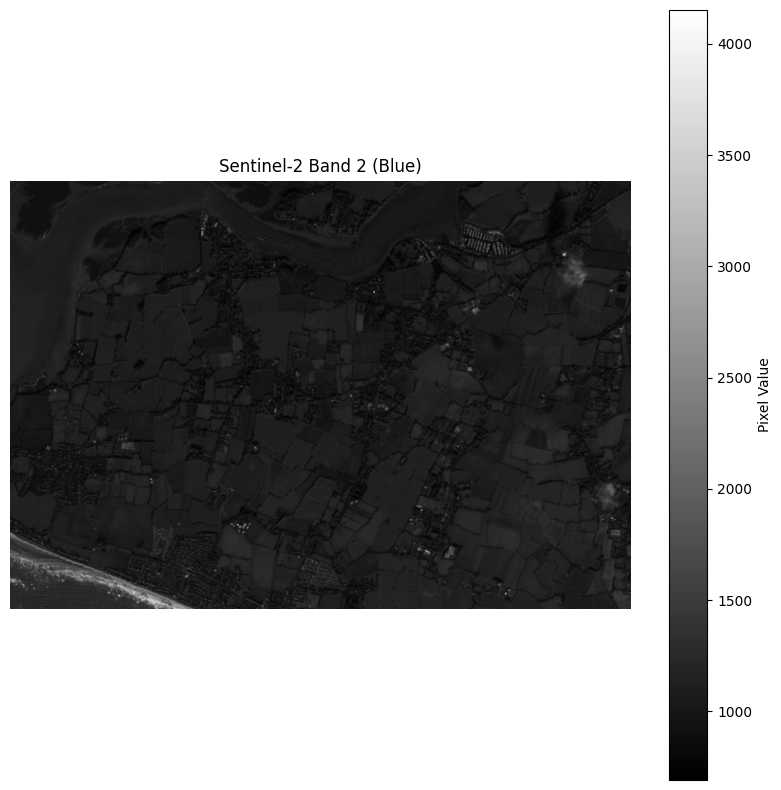

In [15]:
import matplotlib.pyplot as plt
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    # Read only Band 2 (Blue)
    img_band2 = src.read(2)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img_band2, cmap='gray')  # Use grayscale colormap for single-band images
plt.axis('off')  # Turn off axis
plt.title('Sentinel-2 Band 2 (Blue)')
plt.colorbar(label='Pixel Value')
plt.show()


In [19]:
import matplotlib.pyplot as plt
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    # Read Red, Green, and Blue bands (bands 4, 3, and 2 respectively)
    img_red = src.read(4)
    img_green = src.read(3)
    img_blue = src.read(2)

# Stack the bands to create the RGB image
img_rgb = np.stack((img_red, img_green, img_blue), axis=-1)

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.title('Sentinel-2 RGB Image')
plt.show()


IndexError: band index 4 out of range (not in (1, 2, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of bands in the image: 3


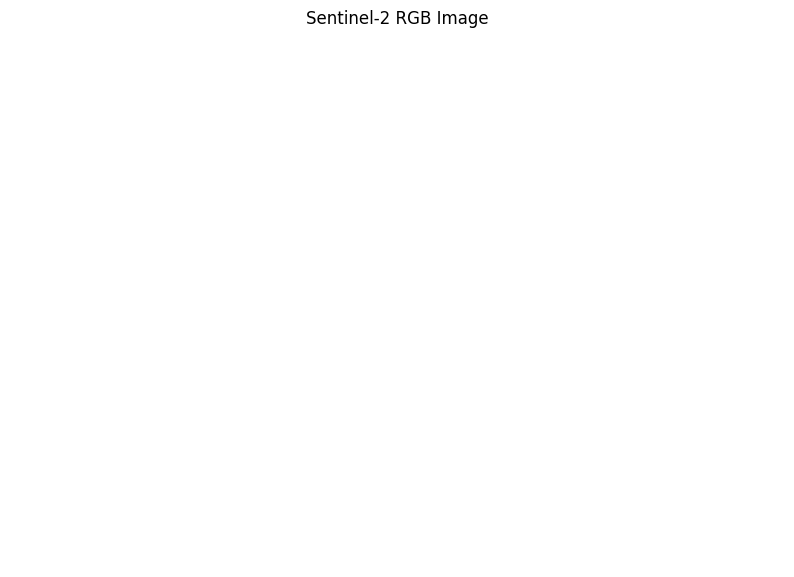

In [20]:
import matplotlib.pyplot as plt
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    # Check the number of bands available in the image
    num_bands = src.count
    print("Number of bands in the image:", num_bands)
    
    # Read the available bands
    if num_bands >= 3:
        img_red = src.read(1)  # Assuming band 1 is Red
        img_green = src.read(2)  # Assuming band 2 is Green
        img_blue = src.read(3)  # Assuming band 3 is Blue
    else:
        print("Error: Insufficient number of bands in the image.")

# Stack the bands to create the RGB image
if num_bands >= 3:
    img_rgb = np.stack((img_red, img_green, img_blue), axis=-1)

    # Plot the RGB image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis
    plt.title('Sentinel-2 RGB Image')
    plt.show()


In [6]:
import numpy as np
from sklearn.cluster import KMeans
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    img = src.read(2)  # Read the second band (assuming you want to use band 2)
    img_shape = img.shape
    img_flat = img.flatten()

# Reshape the image array for clustering
X = img_flat.reshape((-1, 1))

# Perform KMeans clustering
k_means = KMeans(n_clusters=8)
k_means.fit(X)

# Assign cluster labels to each pixel
X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img_shape)

print(X_cluster.shape)


(519, 751)


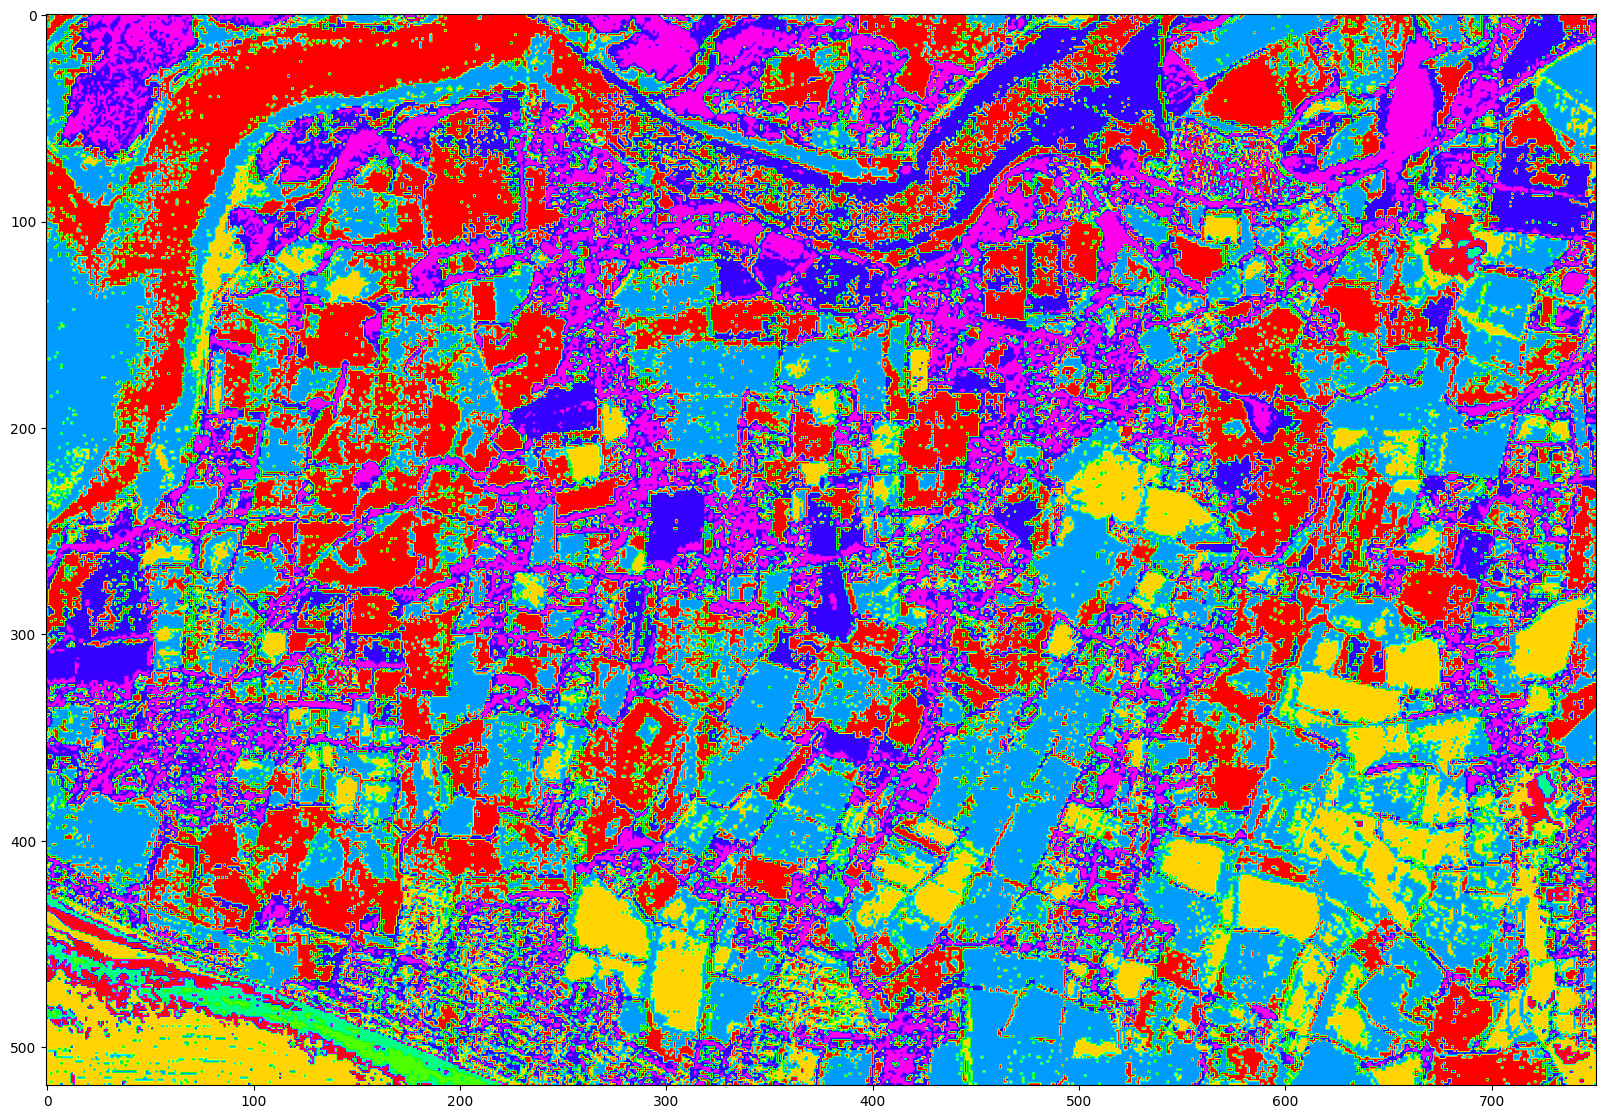

In [7]:
%matplotlib inline  

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()

This is just band 2 of Sentinel 2. What about all 13 bands?

In [9]:
import numpy as np
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    img = src.read()  # Read all bands
    img_shape = img.shape
    
    # Reshape the image array for clustering
    X = img.transpose(1, 2, 0).reshape((-1, img.shape[0]))  # Reshape to (rows * cols, bands)

print(X.shape)


(389769, 3)


In [11]:
import numpy as np
from sklearn import cluster
import rasterio

# Read in raster image
with rasterio.open('South_coast.tif') as src:
    img = src.read()  # Read all bands
    img_shape = img.shape
    
    # Reshape the image array for clustering
    X = img.transpose(1, 2, 0).reshape((-1, img.shape[0]))  # Reshape to (rows * cols, bands)

# Perform KMeans clustering
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

# Get cluster labels
X_cluster = k_means.labels_

# Reshape cluster labels to match image dimensions
X_cluster = X_cluster.reshape(img_shape[1], img_shape[2])

print(X_cluster.shape)


(519, 751)


(519, 751)


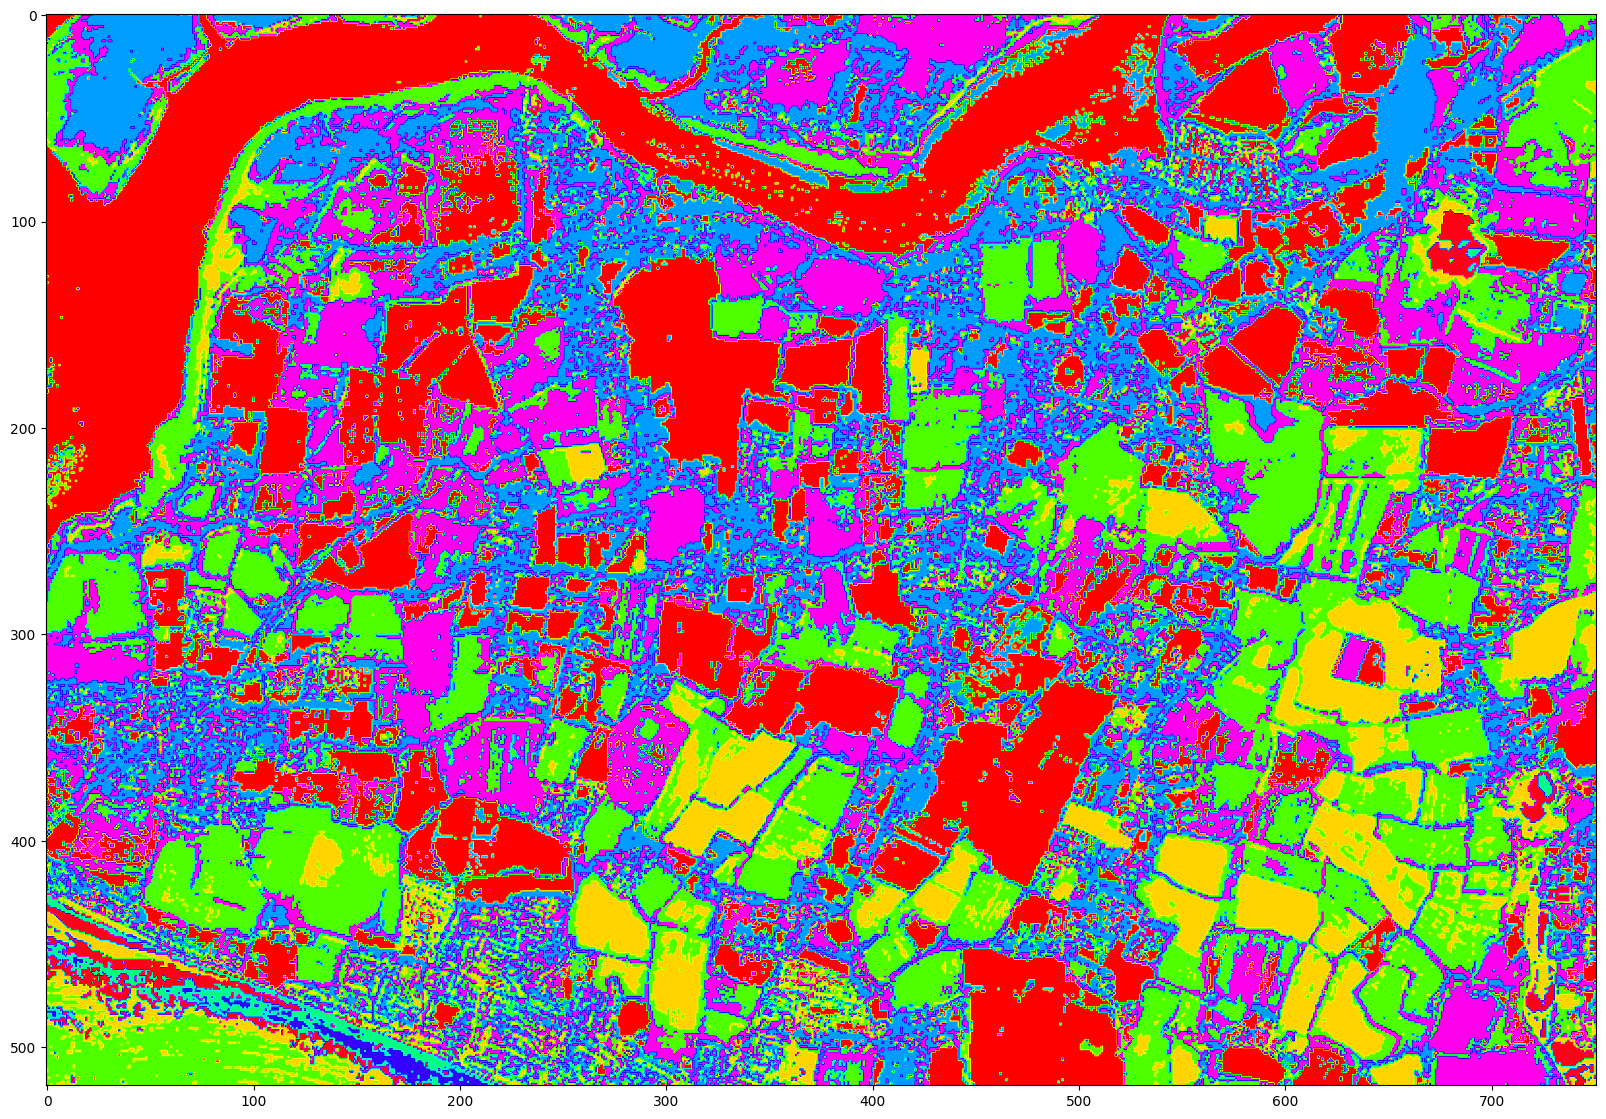

In [13]:
%matplotlib inline  

import matplotlib.pyplot as plt
print (X_cluster.shape)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()